In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler

from core.preprocessing import Preprocessor

In [2]:
def gauss(x, x0, A, sigma):
    return A * np.exp(-(x - x0)**2/(2*(sigma)** 2))

In [3]:
df = pd.read_excel("merged_for_angular.xlsx", index_col=0)

In [4]:
pp = Preprocessor(df)

In [5]:
new_df = pp.mirror_angular_data("aver", range_=(0, 180), dud=["l", "r"])

In [6]:
new_df

,aver,0.750,1.500,2.500,3.500,4.500,5.500,6.500,7.500,8.500,9.500,10.500,11.500,12.500,13.500
0,4,5028700000,10278000000,16859000000,24078000000,31037000000,33884000000,33049000000,31240000000,27103000000,24344000000,24126000000,21383000000,12197000000,4299900000
1,12,4895800000,9436500000,15109000000,19872000000,24963000000,25501000000,24466000000,22748000000,20167000000,19041000000,17948000000,16495000000,10311000000,6516000000
2,20,4408900000,8128600000,12324000000,15020000000,17761000000,17080000000,16206000000,14961000000,13411000000,13202000000,13515000000,11894000000,8844600000,7660900000
3,28,3849000000,6905100000,9559800000,11050000000,12150000000,11202000000,10227000000,9258400000,8331300000,8932300000,8787700000,7577100000,6127500000,5714100000
4,36,3379300000,5767800000,7492500000,8272600000,8208700000,7376800000,6521000000,5578200000,5384600000,5694500000,5453700000,4339400000,3383300000,3061200000
5,44,2860400000,4854500000,6059600000,6223700000,5833100000,5205000000,4337100000,3655700000,3496400000,3641400000,3272600000,2554900000,1683100000,1412400000
6,52,2449000000,4106300000,4841500000,4833300000,4264800000,3628100000,3088100000,2634100000,2527200000,2484900000,2177100000,1539500000,1133300000,934250000
7,60,2087000000,3462600000,3984900000,3825900000,3259800000,2793000000,2247200000,1963800000,1999000000,1955600000,1742900000,1252600000,1120000000,996250000
8,68,1701700000,2923500000,3272900000,2913300000,2556600000,2168300000,1813600000,1649600000,1671000000,1668200000,1443700000,1173400000,1108600000,1025600000
9,76,1351200000,2392400000,2570400000,2214900000,2014300000,1653500000,1454000000,1354100000,1413800000,1349100000,1126900000,1058100000,914890000,723220000


In [7]:
new_df["aver"] = pp.zero_centered_normalize(new_df["aver"].to_numpy())

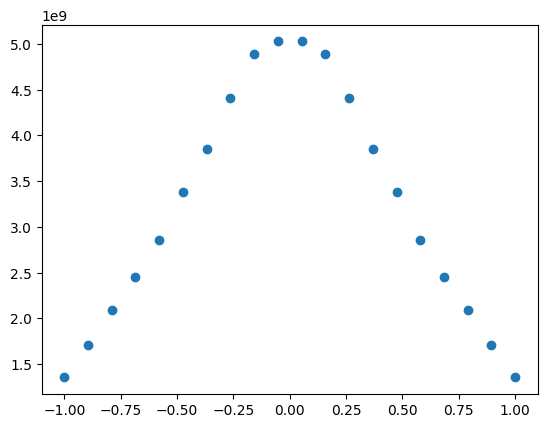

In [8]:
plt.scatter(new_df["aver"], new_df["0.750"])

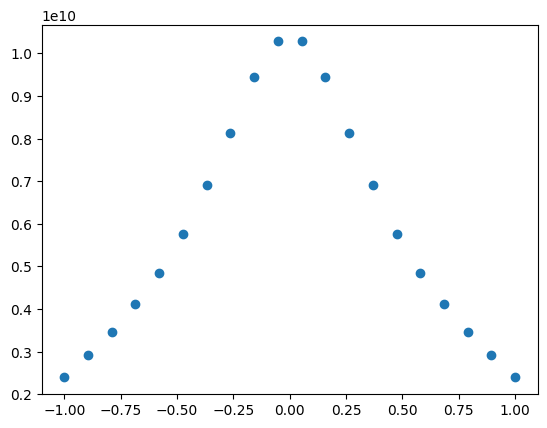

In [9]:
plt.scatter(new_df["aver"], new_df["1.500"])

In [10]:
popt, pcov = curve_fit(gauss, new_df["aver"], new_df["0.750"]/new_df["0.750"].max())
popt

array([-7.66628891e-06,  9.73037748e-01,  5.92221278e-01])

In [ ]:
plt.scatter(new_df["aver"], new_df["0.750"]/new_df["0.750"].max())
plt.scatter(new_df["aver"], gauss(new_df["aver"], *popt))

In [ ]:
popt, pcov = curve_fit(gauss, new_df["aver"], new_df["1.500"]/new_df["1.500"].max())
popt

In [ ]:
plt.scatter(new_df["aver"],  new_df["1.500"]/new_df["1.500"].max())
plt.scatter(new_df["aver"], gauss(new_df["aver"], *popt))

In [ ]:
df = pd.read_excel("merged_for_angular_cos.xlsx", index_col=0)

In [ ]:
pp = Preprocessor(df)

In [ ]:
pp.drop_secondary_data()

In [ ]:
new_df = pp.mirror_df("aver", range_=(0, 1), cos=True)

In [ ]:
new_df["aver"] = pp.zero_centered_normalize(new_df["aver"].to_numpy())

In [ ]:
plt.scatter(new_df["aver"], new_df["0.750"])

In [ ]:
popt, pcov = curve_fit(gauss, new_df["aver"], new_df["0.750"]/new_df["0.750"].max())
popt

In [ ]:
plt.scatter(new_df["aver"], new_df["0.750"]/new_df["0.750"].max())
plt.scatter(new_df["aver"], gauss(new_df["aver"], *popt))